In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Loading Data

In [257]:
# Loading Data set
df_list = pd.read_csv('listings.csv')

In [258]:
# First look at first 5 rows of our data frame 
df_list.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360863,https://www.airbnb.com/rooms/360863,20240320024717,2024-03-20,previous scrape,SPECIAL OFFER @ COSY AND CHARMING,Fully furnished and renovated apartment in the...,The Barceloneta is a triangular spit of land t...,https://a0.muscache.com/pictures/4378248/3e40f...,1824328,https://www.airbnb.com/users/show/1824328,Umberto,2012-02-28,"Barcelona, Spain",I am passionate about traveling and discoverin...,NaN,NaN,57%,t,https://a0.muscache.com/im/users/1824328/profi...,https://a0.muscache.com/im/users/1824328/profi...,La Barceloneta,2.0,4.0,"['email', 'phone']",t,f,"Barcelona, Catalonia, Spain",la Barceloneta,Ciutat Vella,41.384280,2.195760,Private room in rental unit,Private room,2,NaN,1 private bath,NaN,NaN,"[""Cleaning available during stay"", ""Baking she...",NaN,31,150,31,31,150,150,31.0,150.0,NaN,NaN,0,0,0,0,2024-03-20,32,0,0,2012-04-13,2015-10-21,4.73,4.84,4.84,4.91,4.94,4.71,4.74,NaN,f,2,1,1,0,0.22
1,17475,https://www.airbnb.com/rooms/17475,20240320024717,2024-03-20,city scrape,Attic Sagrada Familia,Beautiful attic apartment <br />with large ter...,NaN,https://a0.muscache.com/pictures/f6e6718f-dba0...,65623,https://www.airbnb.com/users/show/65623,Luca,2009-12-25,"Rome, Italy",Italian.,within a few hours,100%,82%,f,https://a0.muscache.com/im/pictures/user/989d6...,https://a0.muscache.com/im/pictures/user/989d6...,Dreta de l'Eixample,2.0,6.0,"['email', 'phone']",t,t,NaN,la Dreta de l'Eixample,Eixample,41.399390,2.170440,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Outdoor dining area"", ""Private ...",$165.00,3,90,3,3,90,90,3.0,90.0,NaN,t,0,0,0,7,2024-03-20,29,12,1,2010-07-10,2024-03-01,4.48,4.73,4.23,4.82,4.73,4.82,4.50,NaN,f,1,1,0,0,0.17
2,18674,https://www.airbnb.com/rooms/18674,20240320024717,2024-03-20,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia Maria,2010-01-19,"Barcelona, Spain","We are Mireia (47) & Maria (49), two multiling...",within an hour,97%,85%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,la Sagrada Família,44.0,46.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.405560,2.172620,Entire rental unit,Entire home/apt,8,2.0,2 baths,3.0,6.0,"[""Paid parking on premises"", ""Private patio or...",$210.00,1,1125,1,4,1125,1125,2.9,1125.0,NaN,t,18,41,63,252,2024-03-20,40,6,0,2013-05-27,2023-11-07,4.33,4.44,4.62,4.74,4.67,4.77,4.28,HUTB-002062,t,28,28,0,0,0.30
3,97529,https://www.airbnb.c

In [259]:
# Representing columns in form of list for easier access to column names for later analysis
columns = df_list.columns.tolist()
print(columns)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

# Data Analysis

In [260]:
# General statistics of our data frame
df_list.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.851900e+04,1.851900e+04,1.851900e+04,18517.000000,18517.000000,18519.000000,18519.000000,18519.000000,14668.000000,16519.000000,14589.000000,18519.000000,18519.000000,18519.000000,18519.000000,18519.000000,1.851900e+04,18519.000000,1.851900e+04,0.0,18519.000000,18519.000000,18519.000000,18519.000000,18519.000000,18519.000000,18519.000000,13763.000000,13760.000000,13761.000000,13758.000000,13762.000000,13758.000000,13758.000000,18519.000000,18519.000000,18519.000000,18519.000000,13762.000000
mean,3.811143e+17,2.024032e+13,1.768051e+08,52.250743,65.224874,41.392012,2.166844,3.355365,1.397225,1.821176,2.439304,15.495707,554.094174,14.808197,20.074680,600.143906,2.325812e+05,17.096917,6.354197e+04,NaN,7.302068,17.434203,30.544792,166.087586,45.016362,11.785680,0.869593,4.594146,4.645266,4.610530,4.722092,4.723707,4.750413,4.469025,38.877639,27.318700,11.426481,0.080890,1.394233
std,4.446839e+17,7.207226e+00,1.810549e+08,113.832517,134.402405,0.014056,0.017533,2.146970,0.707026,1.187520,1.888180,32.853924,433.126089,36.657950,51.637616,460.396652,2.231641e+07,39.411224,6.053641e+06,NaN,9.696240,19.682439,30.289702,122.390643,92.869574,24.101162,1.897413,0.471113,0.463743,0.474659,0.435885,0.439632,0.355998,0.530107,78.763345,63.959218,49.417188,0.697024,1.887771
min,1.747500e+04,2.024032e+13,3.073000e+03,1.000000,1.000000,41.352720,2.085593,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.331886e+07,2.024032e+13,1.038056e+07,2.000000,3.000000,41.381006,2.156513,2.000000,1.000000,1.000000,1.000000,1.000000,300.000000,1.000000,3.000000,200.000000,3.330000e+02,2.000000,3.300000e+02,NaN,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,4.450000,4.520000,4.490000,4.660000,4.650000,4.670000,4.320000,1.000000,0.000000,0.000000,0.000000,0.230000
50%,5.021979e+07,2.024032e+13,1.066022e+08,7.000000,9.000000,41.389710,2.167770,3.000000,1.000000,1.000000,2.000000,3.000000,365.000000,2.000000,5.000000,365.000000,3.650000e+02,3.900000,3.650000e+02,NaN,2.000000,10.000000,22.000000,179.000000,6.000000,2.000000,0.000000,4.700000,4.760000,4.730000,4.850000,4.860000,4.840000,4.570000,6.000000,2.000000,0.000000,0.000000,0.790000
75%,8.598607e+17,2.024032e+13,3.412215e+08,40.000000,54.000000,41.401355,2.177430,4.000000,2.000000,2.000000,3.000000,31.000000,1125.000000,31.000000,31.000000,1125.000000,1.125000e+03,31.000000,1.125000e+03,NaN,12.000000,29.000000,53.000000,269.000000,46.000000,16.000000,1.000000,4.910000,4.940000,4.930000,5.000000,5.000000,5.000000,4.790000,32.000000,20.000000,2.000000,0.000000,2.050000
max,1.115690e+18,2.024032e+13,5.677036e+08,771.000000,2005.000000,41.458092,2.227710,16.000000,10.000000,18.000000,30.000000,1124.000000,3000.000000,1900.000000,2705.000000,9999.000000,2.147484e+09,1900.000000,5.825358e+08,NaN,30.000000,60.000000,90.000000,365.000000,2016.000000,1197.000000,79.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,358.000000,358.000000,336.000000,11.000000,68.790

<Axes: >

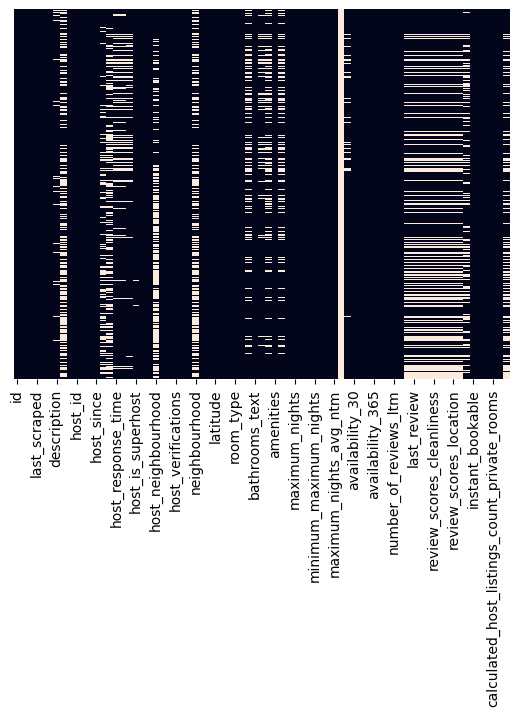

In [261]:
# Graphical representation of missing data (white spots represent missing data)
sns.heatmap(df_list.isnull(),yticklabels=False,cbar=False)

In [262]:
# Representation of missing data in %

def missing_values_table(df):
    miss_val = df.isnull().sum()
    miss_val_percent = 100 * df.isnull().sum() / len(df)
    miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)
    miss_val_table_ren_columns = miss_val_table.rename(columns = {0 : 'Missing values', 1 : 'Missing % of total values'})
    miss_val_table_ren_columns = miss_val_table_ren_columns[miss_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Missing % of total values', ascending=False).round(1)
    return miss_val_table_ren_columns

print("Missing values in train set:")
print(missing_values_table(df_list))

Missing values in train set:
                             Missing values  Missing % of total values
calendar_updated                      18519                      100.0
host_neighbourhood                     9344                       50.5
neighbourhood                          8655                       46.7
neighborhood_overview                  8655                       46.7
host_about                             6798                       36.7
license                                6018                       32.5
review_scores_value                    4761                       25.7
review_scores_location                 4761                       25.7
review_scores_checkin                  4761                       25.7
review_scores_accuracy                 4759                       25.7
review_scores_cleanliness              4758                       25.7
review_scores_communication            4757                       25.7
last_review                            4757     

In [263]:
# Finding the columns with more than 75% of values missing
set(df_list.columns[df_list.isnull().mean()>0.75])

{'calendar_updated'}

In [264]:
# Finding the columns with more than 50% of values missing
set(df_list.columns[df_list.isnull().mean()>0.5])

{'calendar_updated', 'host_neighbourhood'}

In [265]:
# Finding the columns with more than 25% of values missing
set(df_list.columns[df_list.isnull().mean()>0.25])

{'calendar_updated',
 'first_review',
 'host_about',
 'host_neighbourhood',
 'last_review',
 'license',
 'neighborhood_overview',
 'neighbourhood',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month'}

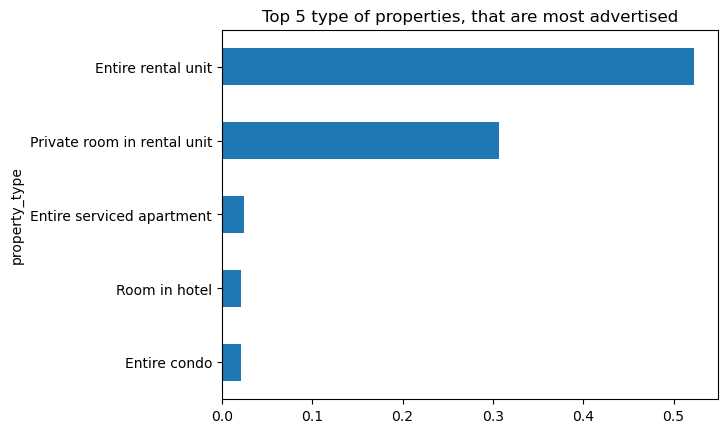

In [266]:
# Exploring the data for number of property types
neighbourhood_vals = df_list['property_type'].value_counts()
((neighbourhood_vals[0:5] / df_list.shape[0]).sort_values()).plot(kind = "barh");
plt.title("Top 5 type of properties, that are most advertised");

In [267]:
# Checking the "property type" count above 100
neighbourhood_vals[df_list['property_type'].value_counts() > 100]

property_type
Entire rental unit             9681
Private room in rental unit    5674
Entire serviced apartment       465
Room in hotel                   402
Entire condo                    395
Entire loft                     289
Private room in condo           213
Private room in hostel          199
Room in boutique hotel          193
Private room in home            187
Name: count, dtype: int64

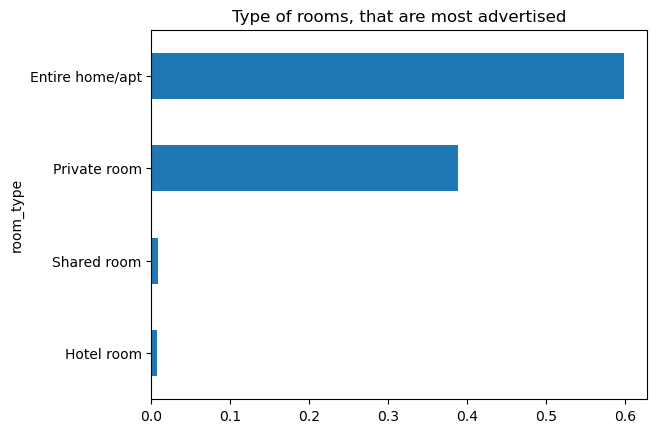

In [268]:
# Exploring the data for number of room types
room_types = df_list['room_type'].value_counts()
((room_types/df_list.shape[0]).sort_values()).plot(kind="barh");
plt.title("Type of rooms, that are most advertised");

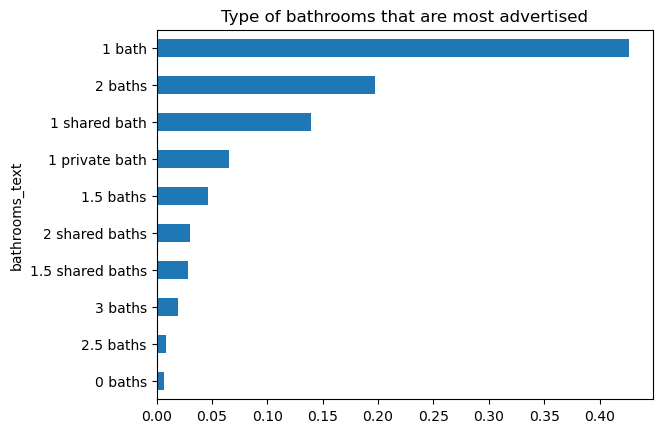

In [269]:
# Exploring the data of column bathrooms_text
bathroom_types = df_list['bathrooms_text'].value_counts()
top_10_bathroom_types = bathroom_types.nlargest(10)
(top_10_bathroom_types / df_list.shape[0]).sort_values().plot(kind="barh")
plt.title("Type of bathrooms that are most advertised")
plt.show()

In [270]:
# Now i want also to see frequency of each amenity 
# but since those are packed inside lists i need a way to convert them into 1 dimensional list
def to_1D(series):
    """
    Flattens a Pandas Series of lists into a single 1D Series.

    Parameters:
    series (pd.Series): series containing lists

    Returns:
    pd.Series: 1D series with all elements from the original lists
    
    """
    
    flattened_list = []

    for sublist in series:
        for item in sublist:
            flattened_list.append(item)

    return pd.Series(flattened_list)

In [271]:
def plot_top_amenities(df_list, top_n=10):
    """
    This function creates a bar plot showing the top N amenities in the dataFrame.

    Parameters:
    df_list: dataFrame containing the "amenities" column
    top_n (int): number of top amenities to display (default is 10)
    
    """
    # Ensuring that the 'amenities' column is in list format
    df_list["amenities"] = df_list["amenities"].apply(eval)
    
    # Flatten the list of amenities and getting the top N
    amenities_series = to_1D(df_list["amenities"])
    top_amenities = amenities_series.value_counts().head(top_n)
    
    # Convert to DataFrame for plotting
    df_amenities_top_n = pd.DataFrame(top_amenities).reset_index()
    df_amenities_top_n.columns = ['Amenity', 'Count']
    
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Count', y='Amenity', data=df_amenities_top_n, palette="icefire")
    plt.title(f'Top {top_n} Amenities')
    plt.xlabel('Count')
    plt.ylabel('Amenity')
    plt.show()

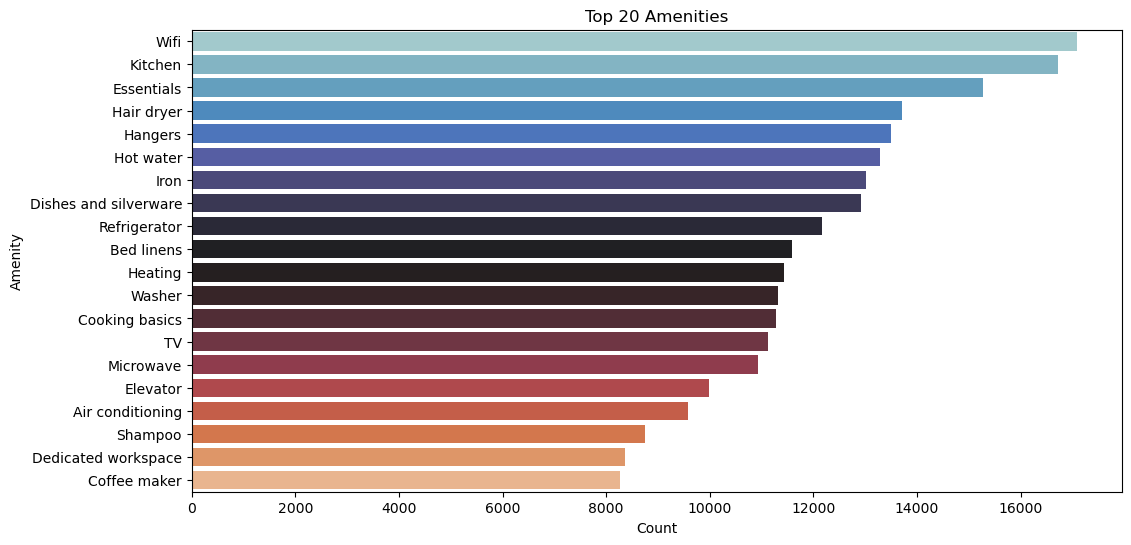

In [272]:
# Groph for top 20 Amenities
df_list_for_graph = pd.read_csv("listings.csv")
plot_top_amenities(df_list_for_graph, top_n=20)

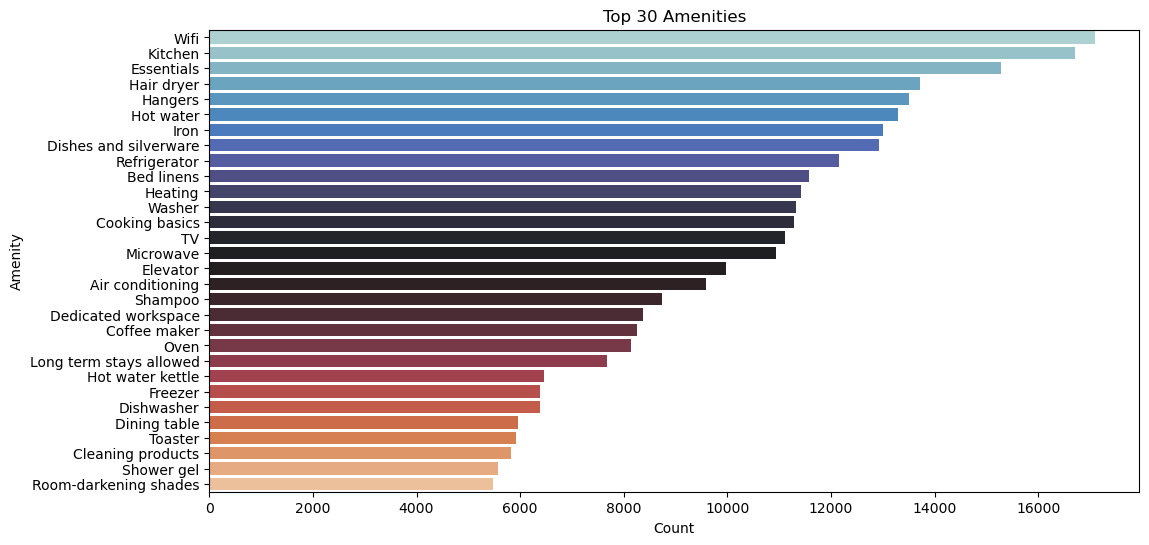

In [273]:
# Graph for top 40 amenities
df_list_for_graph = pd.read_csv("listings.csv")
plot_top_amenities(df_list_for_graph, top_n=30)

# Data Cleaning

In [274]:
# Loading data set again for visibility
df_list.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360863,https://www.airbnb.com/rooms/360863,20240320024717,2024-03-20,previous scrape,SPECIAL OFFER @ COSY AND CHARMING,Fully furnished and renovated apartment in the...,The Barceloneta is a triangular spit of land t...,https://a0.muscache.com/pictures/4378248/3e40f...,1824328,https://www.airbnb.com/users/show/1824328,Umberto,2012-02-28,"Barcelona, Spain",I am passionate about traveling and discoverin...,NaN,NaN,57%,t,https://a0.muscache.com/im/users/1824328/profi...,https://a0.muscache.com/im/users/1824328/profi...,La Barceloneta,2.0,4.0,"['email', 'phone']",t,f,"Barcelona, Catalonia, Spain",la Barceloneta,Ciutat Vella,41.384280,2.195760,Private room in rental unit,Private room,2,NaN,1 private bath,NaN,NaN,"[""Cleaning available during stay"", ""Baking she...",NaN,31,150,31,31,150,150,31.0,150.0,NaN,NaN,0,0,0,0,2024-03-20,32,0,0,2012-04-13,2015-10-21,4.73,4.84,4.84,4.91,4.94,4.71,4.74,NaN,f,2,1,1,0,0.22
1,17475,https://www.airbnb.com/rooms/17475,20240320024717,2024-03-20,city scrape,Attic Sagrada Familia,Beautiful attic apartment <br />with large ter...,NaN,https://a0.muscache.com/pictures/f6e6718f-dba0...,65623,https://www.airbnb.com/users/show/65623,Luca,2009-12-25,"Rome, Italy",Italian.,within a few hours,100%,82%,f,https://a0.muscache.com/im/pictures/user/989d6...,https://a0.muscache.com/im/pictures/user/989d6...,Dreta de l'Eixample,2.0,6.0,"['email', 'phone']",t,t,NaN,la Dreta de l'Eixample,Eixample,41.399390,2.170440,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Outdoor dining area"", ""Private ...",$165.00,3,90,3,3,90,90,3.0,90.0,NaN,t,0,0,0,7,2024-03-20,29,12,1,2010-07-10,2024-03-01,4.48,4.73,4.23,4.82,4.73,4.82,4.50,NaN,f,1,1,0,0,0.17
2,18674,https://www.airbnb.com/rooms/18674,20240320024717,2024-03-20,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia Maria,2010-01-19,"Barcelona, Spain","We are Mireia (47) & Maria (49), two multiling...",within an hour,97%,85%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,la Sagrada Família,44.0,46.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.405560,2.172620,Entire rental unit,Entire home/apt,8,2.0,2 baths,3.0,6.0,"[""Paid parking on premises"", ""Private patio or...",$210.00,1,1125,1,4,1125,1125,2.9,1125.0,NaN,t,18,41,63,252,2024-03-20,40,6,0,2013-05-27,2023-11-07,4.33,4.44,4.62,4.74,4.67,4.77,4.28,HUTB-002062,t,28,28,0,0,0.30
3,97529,https://www.airbnb.c

In [275]:
# Checking the shape of data set to be sure we didn't change data by accident
df_list.shape

(18519, 75)

In [276]:
# Displaying all columns
pd.set_option('display.max_columns', None)

# show listings data sample
df_list.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360863,https://www.airbnb.com/rooms/360863,20240320024717,2024-03-20,previous scrape,SPECIAL OFFER @ COSY AND CHARMING,Fully furnished and renovated apartment in the...,The Barceloneta is a triangular spit of land t...,https://a0.muscache.com/pictures/4378248/3e40f...,1824328,https://www.airbnb.com/users/show/1824328,Umberto,2012-02-28,"Barcelona, Spain",I am passionate about traveling and discoverin...,NaN,NaN,57%,t,https://a0.muscache.com/im/users/1824328/profi...,https://a0.muscache.com/im/users/1824328/profi...,La Barceloneta,2.0,4.0,"['email', 'phone']",t,f,"Barcelona, Catalonia, Spain",la Barceloneta,Ciutat Vella,41.38428,2.19576,Private room in rental unit,Private room,2,NaN,1 private bath,NaN,NaN,"[""Cleaning available during stay"", ""Baking she...",NaN,31,150,31,31,150,150,31.0,150.0,NaN,NaN,0,0,0,0,2024-03-20,32,0,0,2012-04-13,2015-10-21,4.73,4.84,4.84,4.91,4.94,4.71,4.74,NaN,f,2,1,1,0,0.22
1,17475,https://www.airbnb.com/rooms/17475,20240320024717,2024-03-20,city scrape,Attic Sagrada Familia,Beautiful attic apartment <br />with large ter...,NaN,https://a0.muscache.com/pictures/f6e6718f-dba0...,65623,https://www.airbnb.com/users/show/65623,Luca,2009-12-25,"Rome, Italy",Italian.,within a few hours,100%,82%,f,https://a0.muscache.com/im/pictures/user/989d6...,https://a0.muscache.com/im/pictures/user/989d6...,Dreta de l'Eixample,2.0,6.0,"['email', 'phone']",t,t,NaN,la Dreta de l'Eixample,Eixample,41.39939,2.17044,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Outdoor dining area"", ""Private ...",$165.00,3,90,3,3,90,90,3.0,90.0,NaN,t,0,0,0,7,2024-03-20,29,12,1,2010-07-10,2024-03-01,4.48,4.73,4.23,4.82,4.73,4.82,4.50,NaN,f,1,1,0,0,0.17
2,18674,https://www.airbnb.com/rooms/18674,20240320024717,2024-03-20,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia Maria,2010-01-19,"Barcelona, Spain","We are Mireia (47) & Maria (49), two multiling...",within an hour,97%,85%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,la Sagrada Família,44.0,46.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.40556,2.17262,Entire rental unit,Entire home/apt,8,2.0,2 baths,3.0,6.0,"[""Paid parking on premises"", ""Private patio or...",$210.00,1,1125,1,4,1125,1125,2.9,1125.0,NaN,t,18,41,63,252,2024-03-20,40,6,0,2013-05-27,2023-11-07,4.33,4.44,4.62,4.74,4.67,4.77,4.28,HUTB-002062,t,28,28,0,0,0.30


In [277]:
def drop_columns(df):
    
    """
    Function used tp drop columns that aren't needed and
    removing columns with 25% or more of missing data in the column
    
    Parameters:    
    Dataframe
    
    Returns:
    Dataframe
    
    """

    regex_list = ['url','scrape','first_review','last_review','cancellation_policy','requires']
    
    for i in regex_list:
        df = df[df.columns.drop(list(df.filter(regex=i)))]
        
    df = df.drop(columns=['id','name','description','neighborhood_overview','latitude',
                          'longitude','neighbourhood','calendar_updated','host_id', 'host_name', 
                          'host_since', 'host_location', 'host_about','host_response_time',
                          'host_response_rate', 'host_acceptance_rate', 
                          'host_neighbourhood', 'host_listings_count',
                          'host_has_profile_pic', 'host_identity_verified',
                          'minimum_nights_avg_ntm','minimum_minimum_nights', 
                          'minimum_maximum_nights','maximum_nights_avg_ntm',
                          'maximum_minimum_nights','maximum_maximum_nights','source',
                          'host_total_listings_count', 'host_verifications'
                          ])
    
    # remove columns with 25% or high with missing data
    col_nulls = set(df.columns[df.isnull().mean()>0.25])
    df = df.drop(list(col_nulls), axis=1)
    
    return df

<Axes: >

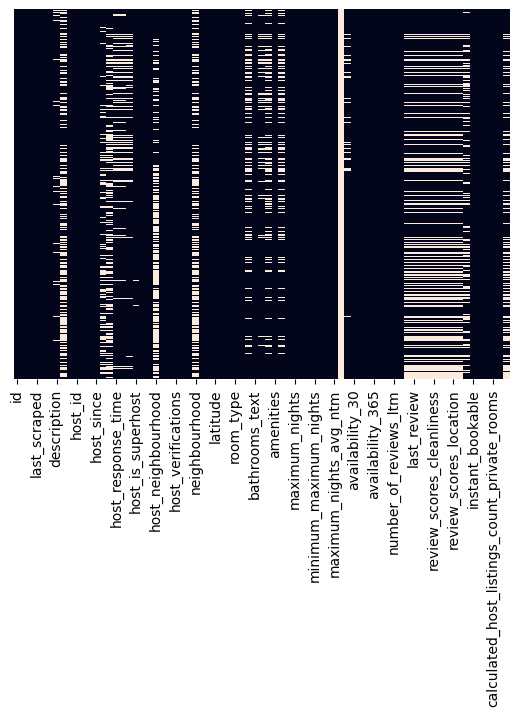

In [278]:
# Again graphicaly checking for missing data
sns.heatmap(df_list.isnull(),yticklabels=False,cbar=False)

In [279]:
# Dropping unwanted columns
df_list = drop_columns(df_list)

In [280]:
# Cheking the shape of tempered data set
df_list.shape

(18519, 27)

<Axes: >

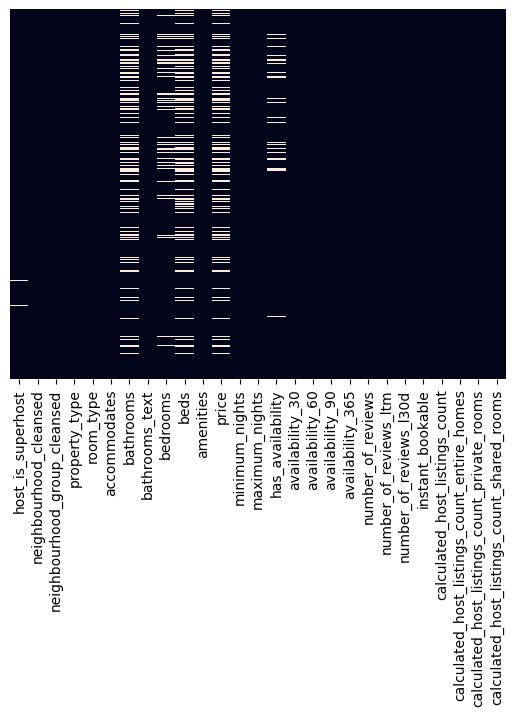

In [281]:
# Checking for remaining missing data
sns.heatmap(df_list.isnull(),yticklabels=False,cbar=False)

In [282]:
#Checking for data types that are still in use
df_list.dtypes

host_is_superhost                                object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                        object
price                                            object
minimum_nights                                    int64
maximum_nights                                    int64
has_availability                                 object
availability_30                                   int64
availability_60                                   int64
availability_90                                 

In [283]:
#checking for missing data with %

def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    return mis_val_table_ren_columns

print("Missing values in train set:")
print(missing_values_table(df_list))

Missing values in train set:
                   Missing Values  % of Total Values
beds                         3930               21.2
price                        3863               20.9
bathrooms                    3851               20.8
bedrooms                     2000               10.8
has_availability             1058                5.7
host_is_superhost             150                0.8
bathrooms_text                 12                0.1


In [284]:
# Dealing with data type of  price column and filling missing ones with mean value
df_list['price'] = df_list['price'].replace(r'[\$,]', '', regex=True).astype(float)
df_list['price'] = df_list['price'].fillna(df_list['price'].mean())

In [285]:
df_list['beds'] = df_list['beds'].fillna(df_list['beds'].mean())

In [286]:
df_list['bathrooms'] = df_list['bathrooms'].fillna(df_list['bathrooms'].mean())

In [287]:
df_list['bedrooms'] = df_list['bedrooms'].fillna(df_list['bedrooms'].mean())

In [290]:
df_list['has_availability'] = df_list['has_availability'].replace({'t': 1.0, 'f': 0.0})
df_list['has_availability'] = df_list['has_availability'].astype(float)
df_list['has_availability'] = df_list['has_availability'].fillna(df_list['has_availability'].mean())

In [291]:
df_list['host_is_superhost'] = df_list['host_is_superhost'].replace({'t': 2.0, 'f': 3.0})
df_list['host_is_superhost'] = df_list['host_is_superhost'].astype(float)
df_list['host_is_superhost'] = df_list['host_is_superhost'].fillna(df_list['host_is_superhost'].mean())

In [292]:
df_list['bathrooms_text'] = df_list['bathrooms_text'].fillna('>1 bathroom<')

<Axes: >

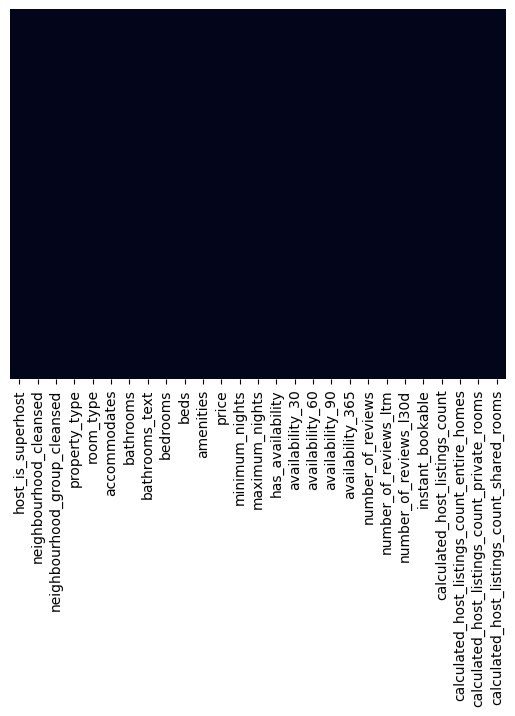

In [293]:
# Final graphical  check for missing data
sns.heatmap(df_list.isnull(),yticklabels=False,cbar=False)

In [294]:
# List check for missing data 
df_list.isnull().sum()

host_is_superhost                               0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
has_availability                                0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0


In [295]:
# Full column display in order to write them down
pd.set_option('display.max_columns', None)
df_list.head()

,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2.0,la Barceloneta,Ciutat Vella,Private room in rental unit,Private room,2,1.397225,1 private bath,1.821176,2.439304,"[""Cleaning available during stay"", ""Baking she...",146.488264,31,150,0.996564,0,0,0,0,32,0,0,f,2,1,1,0
1,3.0,la Dreta de l'Eixample,Eixample,Entire rental unit,Entire home/apt,3,1.000000,1 bath,1.000000,1.000000,"[""Microwave"", ""Outdoor dining area"", ""Private ...",165.000000,3,90,1.000000,0,0,0,7,29,12,1,f,1,1,0,0
2,3.0,la Sagrada Família,Eixample,Entire rental unit,Entire home/apt,8,2.000000,2 baths,3.000000,6.000000,"[""Paid parking on premises"", ""Private patio or...",210.000000,1,1125,1.000000,18,41,63,252,40,6,0,t,28,28,0,0
3,3.0,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,2,1.397225,1 bath,1.000000,2.439304,"[""Microwave"", ""Paid parking off premises"", ""Pr...",146.488264,120,1125,1.000000,0,0,0,0,67,0,0,f,1,1,0,0
4,3.0,el Camp d'en Grassot i Gràcia Nova,Gràcia,Entire rental unit,Entire home/apt,4,1.000000,1 bath,1.000000,2.000000,"[""Microwave"", ""Iron"", ""Dedicated workspace"", ""...",94.000000,1,1125,1.000000,18,45,58,226,54,18,2,f,95,95,0,0


In [296]:
# Extracting columns
columns = ['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
           'property_type', 'room_type', 'bathrooms_text', 'amenities', 'instant_bookable']

In [297]:
len(columns)

7

In [298]:
# Function for finding outliers
def find_outliers(df_list, column_name):
    
    """
    The function finds outliers and removes them
    from the dataframe.
    
    Parameters:
    
    Dataframe, column_name
    
    Returns:
    
    Dataframe
    
    """
    
    # Calculate Q1 (25.% of the data)
    Q1 = np.percentile(df_list[column_name], 25)
    
    #Calculate Q3 (75.% of the data)
    Q3 = np.percentile(df_list[column_name],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    filtered_data = df_list[~((df_list[column_name] >= Q1 - step) & (df_list[column_name] <= Q3 + step))].sort_values(by=[column_name])
    
    return filtered_data

In [299]:
# function for visualiza of outliers distribution in price column
def visualize_outliers(df, column):
    # Find the outliers using the find_outliers function
    outliers = find_outliers(df, column)
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(15, 5))
    
    # Plot the data points
    ax.plot(df.index, df[column], marker='o', linestyle='', markersize=4, label='Data Points')
    
    # Plot the outliers as dots
    ax.plot(outliers.index, outliers[column], marker='o', linestyle='', markersize=6, color='r', label='Outliers')
    
    # Set the title and labels
    ax.set_title(f"Scatter Plot of {column} with Outliers")
    ax.set_xlabel("Index")
    ax.set_ylabel(column)
    
    # Add a legend
    ax.legend()
    
    # Display the plot
    plt.tight_layout()
    plt.show()

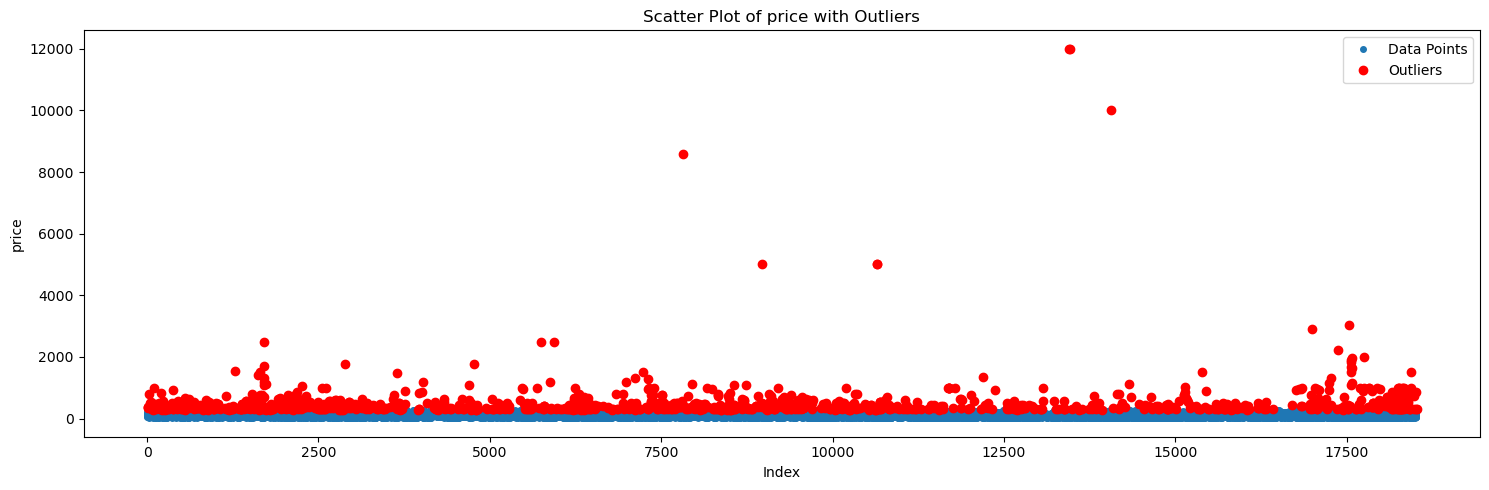

In [300]:
visualize_outliers(df_list, 'price')

In [303]:
# Removing outliers
outliers = find_outliers(df_list, "price").index
                                  
df_list = df_list.drop(df_list.index[outliers]).reset_index(drop = True)

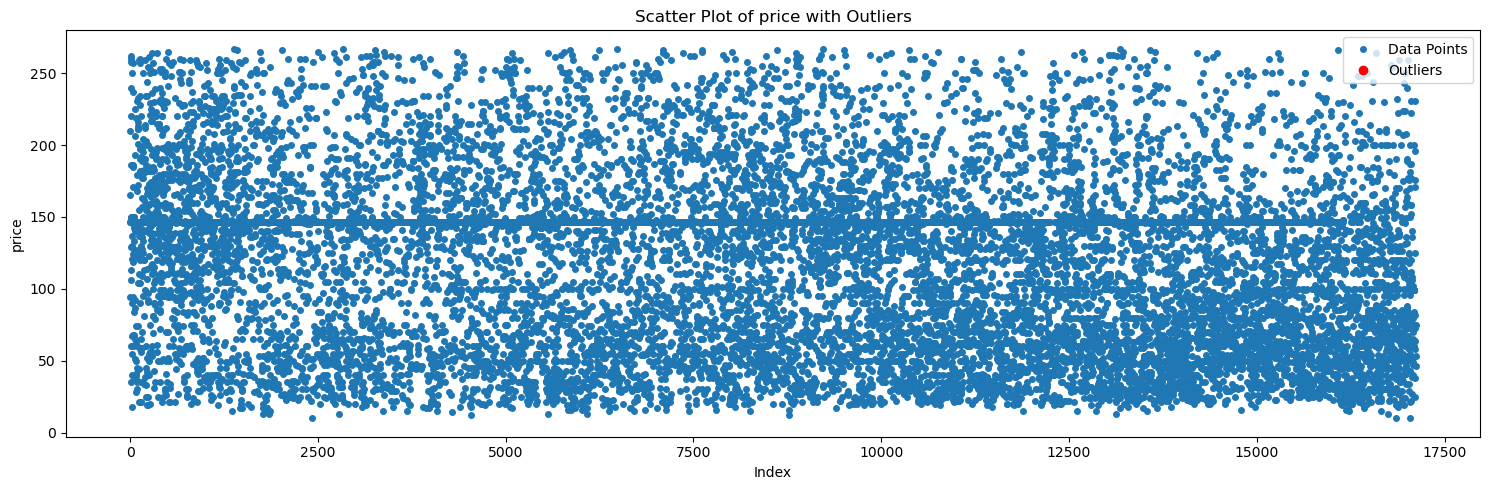

In [304]:
visualize_outliers(df_list, 'price')

In [305]:
def one_hot_encode_columns(df, columns, max_unique_values=20):
    """
    One-hot encode specified columns in a DataFrame using OneHotEncoder from sklearn

    Parameters:
    df: DataFrame 
    columns (list): list of columns to one-hot encode.
    max_unique_values (int): maximum number of unique values to one-hot encode

    Returns:
    df: DataFrame with one-hot encoded columns
    
    """
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

    for column in columns:
        unique_values = df[column].nunique()
        
        if unique_values > max_unique_values:
            # Limit the column to the top max_unique_values categories
            top_values = df[column].value_counts().nlargest(max_unique_values).index
            df[column] = np.where(df[column].isin(top_values), df[column], 'Other')
        
        # Fit and transform the specified column
        encoded_array = encoder.fit_transform(df[[column]])
        
        # Create a DataFrame with the encoded columns
        encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([column]))
        
        # Drop the original column and concatenate the encoded columns
        df = df.drop(column, axis=1)
        df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    
    return df

In [306]:
df_list.shape

(17117, 27)

In [307]:
df_encoded = one_hot_encode_columns(df_list, columns, max_unique_values=20)

In [308]:
# Final check of data frame after finishing with encoding
df_encoded.shape

(17117, 113)

In [309]:
X = df_encoded.drop("price", axis=1) # drop labels for training set
y = df_encoded["price"].copy()

In [310]:
# Applying the train / test split 
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [311]:
# Applying the train / test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [312]:
# Confirming the rows and columns are the same for train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13693, 112)
(3424, 112)
(13693,)
(3424,)


In [313]:
lr_model_LR = LinearRegression()
lr_model_LR.fit(X_train, y_train)
lr_model_LR.score(X_test, y_test)

0.44422565923063984

In [314]:
lr_model_ridge = Ridge()
lr_model_ridge.fit(X_train, y_train)
lr_model_ridge.score(X_test, y_test)

0.44404978357551483

In [315]:
lr_model_RF = RandomForestRegressor()
lr_model_RF.fit(X_train, y_train)
lr_model_RF.score(X_test, y_test)

0.7740956303678077